In [128]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics


In [129]:
import seaborn as sns

In [130]:
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [131]:
company.loc[company["Sales"]>=8.5,'New_sales']="high"
company.loc[company["Sales"]<8.5,"New_sales"]='low'

In [132]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,New_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [135]:
company.New_sales.value_counts()

low     257
high    143
Name: New_sales, dtype: int64

In [89]:
company1=company.drop(["Sales"],axis=1)
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,New_sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,139,23,3,37,120,Medium,55,11,No,Yes,low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [90]:
company1.shape

(400, 11)

In [91]:
company1.sample(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,New_sales
237,151,28,8,499,135,Medium,48,10,Yes,Yes,high
299,135,40,17,497,96,Medium,54,17,No,Yes,high
357,103,73,3,276,72,Medium,34,15,Yes,Yes,high
368,109,22,10,348,79,Good,74,14,No,Yes,high
345,121,68,0,279,149,Good,79,12,Yes,No,low
70,89,81,15,237,99,Good,74,12,Yes,Yes,high
202,121,78,4,413,130,Bad,46,10,No,Yes,low
37,121,41,5,412,110,Medium,54,10,Yes,Yes,low
93,145,30,0,67,104,Medium,55,17,Yes,No,high
234,115,62,11,289,129,Good,56,16,No,Yes,high


In [92]:
company1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'New_sales'],
      dtype='object')

In [93]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  New_sales    400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


there are no null values

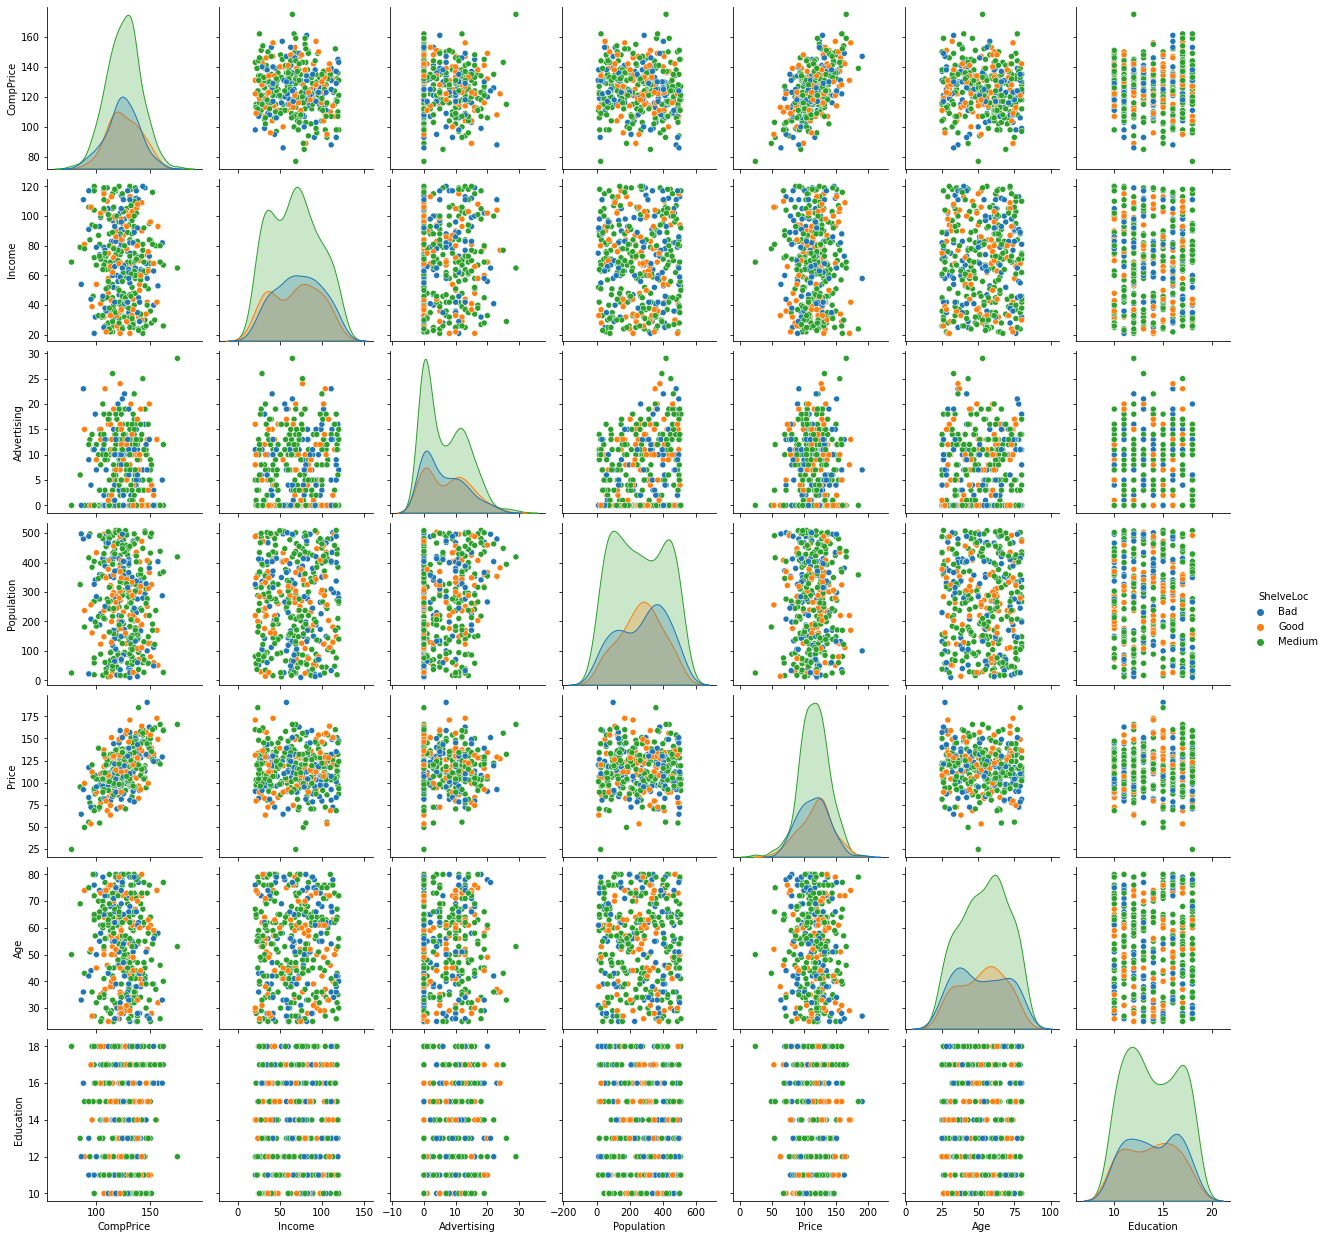

In [94]:
sns.pairplot(data=company1,hue="ShelveLoc")

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

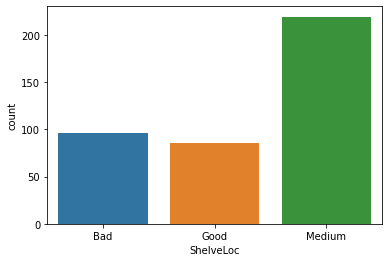

In [95]:
sns.countplot(x="ShelveLoc", data=company1)

In [96]:
#converting into integrrs by using the label encoder 


In [97]:
label_encoder = preprocessing.LabelEncoder()
company1['ShelveLoc']=label_encoder.fit_transform(company1['ShelveLoc'])

In [98]:
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,New_sales
0,138,73,11,276,120,0,42,17,Yes,Yes,high
1,111,48,16,260,83,1,65,10,Yes,Yes,high
2,113,35,10,269,80,2,59,12,Yes,Yes,high
3,117,100,4,466,97,2,55,14,Yes,Yes,low
4,141,64,3,340,128,0,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,Yes,Yes,high
396,139,23,3,37,120,2,55,11,No,Yes,low
397,162,26,12,368,159,2,40,18,Yes,Yes,low
398,100,79,7,284,95,0,50,12,Yes,Yes,low


In [99]:
company1['Urban']=label_encoder.fit_transform(company1['Urban'])

In [105]:
company1["US"]=label_encoder.fit_transform(company1["US"])

In [106]:
company1["New_sales"]=label_encoder.fit_transform(company1["New_sales"])

In [107]:
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,New_sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [108]:
#dividing the data into x==>feature and y==> target variable

In [112]:
x = company1.drop("New_sales",axis=1)
y = company1.New_sales

In [113]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [114]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: New_sales, Length: 400, dtype: int32

In [115]:
company1["ShelveLoc"].unique()

array([0, 1, 2])

In [116]:
company1["New_sales"].unique()

array([0, 1])

In [118]:
company1.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [119]:
company1.New_sales.value_counts()

1    257
0    143
Name: New_sales, dtype: int64

In [120]:
#Splitting the data into training and testing 

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [122]:
model = DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

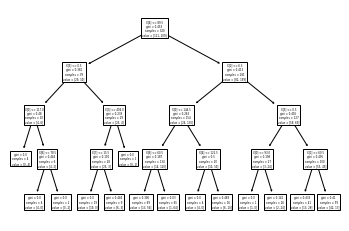

In [123]:

tree.plot_tree(model);

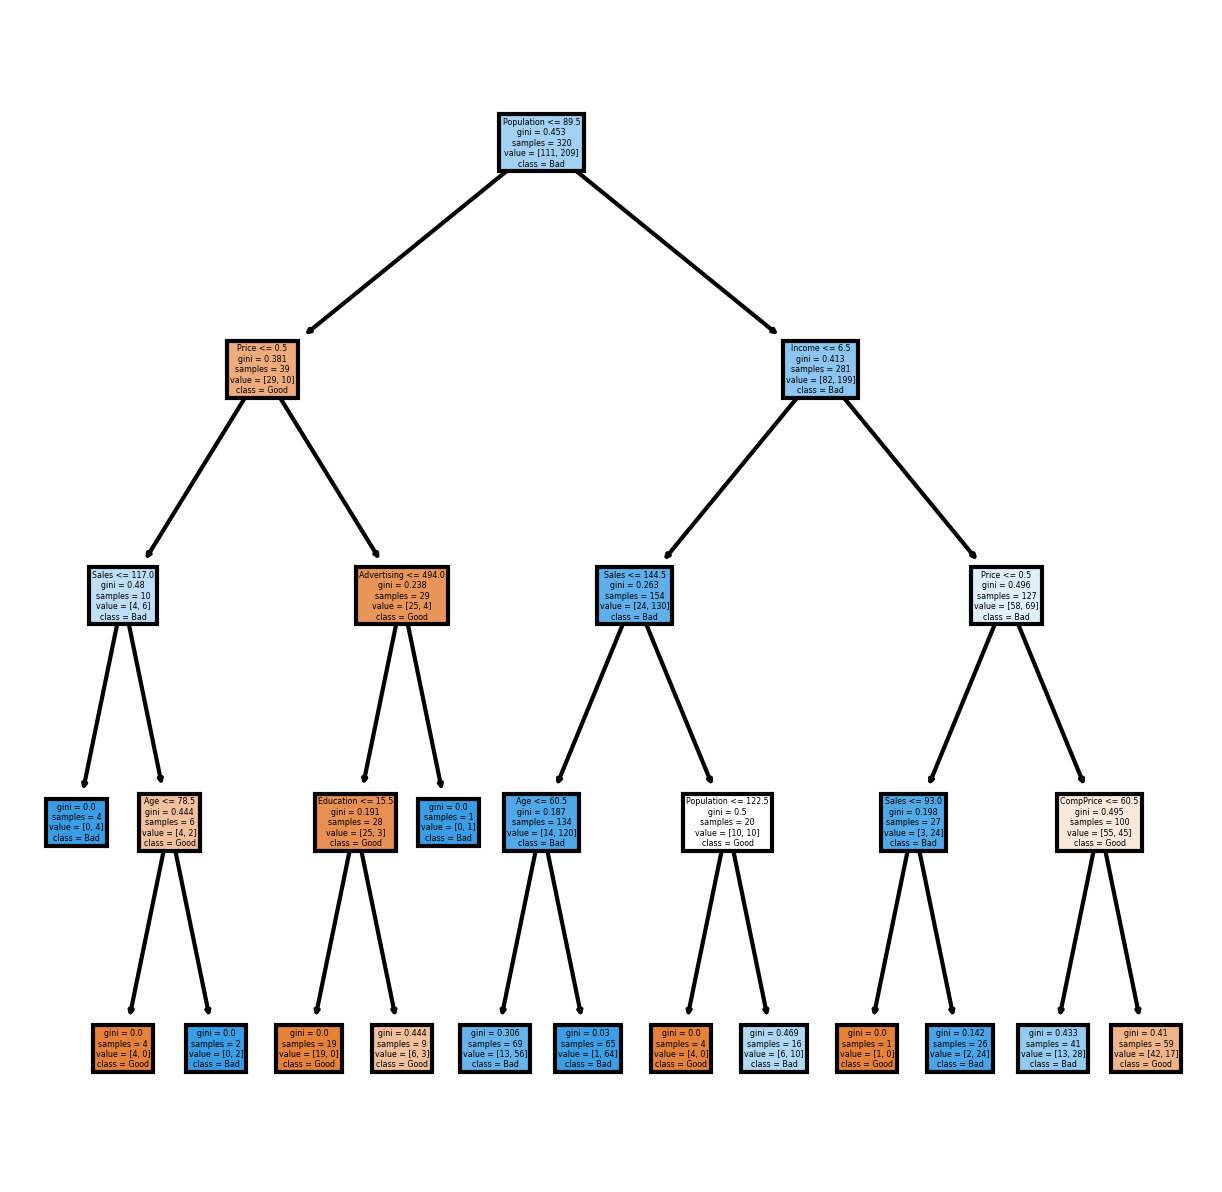

In [124]:
fn = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education', 'Urban', 'US']
cn = ['Good','Bad','Medium']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [125]:
#predicting on test data

In [126]:
preds = model.predict(x_test) #predicting on test data set 
pd.Series(preds).value_counts() #getting the count of each category

1    53
0    27
dtype: int64

In [127]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.7375